In [1]:
import pandas as pd
from colorama import Fore, Back, Style, init
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [2]:
f1=pd.read_csv('fear_greed_index.csv')
print(Fore.BLUE +'Sentiment Data:'+ Style.RESET_ALL)
f1.head()

Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [3]:
print(Fore.BLUE+"summary of the dataframe"+ Style.RESET_ALL)
f1.info()

summary of the dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [4]:
print(Fore.BLUE+"Descriptive statistic"+ Style.NORMAL)
f1.describe(include='all')

Descriptive statistic


,timestamp,value,classification,date
count,2.644000e+03,2644.000000,2644,2644
unique,NaN,NaN,5,2644
top,NaN,NaN,Fear,2018-02-01
freq,NaN,NaN,781,1
mean,1.631899e+09,46.981089,NaN,NaN
std,6.597967e+07,21.827680,NaN,NaN
min,1.517463e+09,5.000000,NaN,NaN
25%,1.574811e+09,28.000000,NaN,NaN
50%,1.631900e+09,46.000000,NaN,NaN
75%,1.688989e+09,66.000000,NaN,NaN


In [5]:
print(Fore.BLUE +"Missing Values in Each Columns"+ Style.RESET_ALL)
f1.isnull().sum()

Missing Values in Each Columns


timestamp         0
value             0
classification    0
date              0
dtype: int64

In [6]:
print(Fore.BLUE +"Duplicate Values in Each Columns"+ Style.RESET_ALL)
f1.duplicated().sum()

Duplicate Values in Each Columns


0

In [7]:
# Convert The 'Date' Column to datetime Objects
f1['date'] = pd.to_datetime(f1['date'])

In [8]:
print(Fore.BLUE +"Unique Values in Classification Columns"+ Style.RESET_ALL)
print(f1['classification'].unique().tolist())
print(Fore.BLUE +" Values counts in Classification Columns"+ Style.RESET_ALL)
f1['classification'].value_counts()

Unique Values in Classification Columns
['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed']
 Values counts in Classification Columns


classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

In [9]:
f1['date'].min()

Timestamp('2018-02-01 00:00:00')

In [10]:
if 'date' in f1.index.names:
    f1.reset_index(inplace=True)
f1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Interpretation of Sentiment Data Loading and Preprocessing:

The Bitcoin Market Sentiment data was loaded successfully, containing 2644 entries and 4 initial columns: timestamp, value, classification, and date.

*Initial State: The date column was initially an object (string) type, and classification was also an object type, while timestamp and value (the numerical sentiment score ranging from 0-100) were integers.
* Missing Values: No missing values were found in any of the columns, simplifying the cleaning process.


*  Date Conversion: The date column (e.g., '2018-02-01') was successfully converted to the datetime64[ns] data type.
*   Sentiment Classifications: The classification column contains 5 unique sentiment states: 'Fear', 'Extreme Fear', 'Neutral', 'Greed', and 'Extreme Greed'. "Fear" was the most frequent classification.

*  Indexing: The date column was subsequently set as the index of the sentiment_df DataFrame.
*  The sentiment data spans from 2018-02-01 to 2025-05-02 (derived from min/max of the index after processing, or from later merge step).

The sentiment_df DataFrame is now cleaned and prepared for merging with the trader data. The key columns for our analysis will be the index (date), value, and classification.





In [11]:
f2=pd.read_csv('historical_data.csv')
print(Fore.BLUE +'Trader Data:'+ Style.RESET_ALL)
f2.head()

Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [12]:
print(Fore.BLUE+"summary of the dataframe"+ Style.RESET_ALL)
f2.info()

summary of the dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64


In [13]:
print(Fore.BLUE+"Descriptive statistic"+ Style.NORMAL)
f2.describe()

Descriptive statistic


,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [14]:
print(Fore.BLUE+"Descriptive statistic"+ Style.NORMAL)
f2.describe(include=['object','category'])

Descriptive statistic


,Account,Coin,Side,Timestamp IST,Direction,Transaction Hash
count,211224,211224,211224,211224,211224,211224
unique,32,246,2,27977,12,101184
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,SELL,14-02-2025 00:31,Open Long,0x00000000000000000000000000000000000000000000...
freq,40184,68005,108528,441,49895,9032


In [15]:
print(Fore.BLUE+"Missing Values in each Columns"+ Style.RESET_ALL)
f2.isnull().sum()

Missing Values in each Columns


Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [16]:
potential_categorical_cols = ['account', 'symbol', 'side', 'event', 'startPositionState']


print(Fore.BLUE +"Unique values in some potential categorical columns"+ Style.RESET_ALL)
for col in potential_categorical_cols:
    if col in f2.columns:
        print(f"\n--- Unique values for '{col}' (top 5 and count) ---")
        # Checks if the column is entirely NaN, which can cause errors with value_counts
        if f2[col].notna().any():
            unique_vals = f2[col].unique()
            print(f"Number of unique values: {len(unique_vals)}")
            if len(unique_vals) > 10: # Show only first 10 if many unique values
                print(f"Sample unique values: {unique_vals[:10]}")
            else:
                print(f"Unique values: {unique_vals}")
            print("Value counts (top 5):")
            print(f2[col].value_counts().nlargest(5))
        else:
            print(f"Column '{col}' contains only NaN values.")
    else:
        print(f"Column '{col}' not found in f2.")

Unique values in some potential categorical columns
Column 'account' not found in f2.
Column 'symbol' not found in f2.
Column 'side' not found in f2.
Column 'event' not found in f2.
Column 'startPositionState' not found in f2.


In [17]:
f2_copy=f2.copy()

In [18]:
print("Original column names:\n", f2_copy.columns.tolist())


Original column names:
 ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [19]:
column_rename_map = {
    'Account': 'account',
    'Coin': 'symbol',
    'Execution Price': 'execution_price',
    'Size Tokens': 'size_tokens',
    'Size USD': 'size_usd',
    'Side': 'side',
    'Timestamp IST': 'time_ist',
    'Start Position': 'start_position_tokens',
    'Direction': 'event_type',
    'Closed PnL': 'closed_pnl',
    'Transaction Hash': 'tx_hash',
    'Order ID': 'order_id',
    'Crossed': 'crossed_maker_taker',
    'Fee': 'fee',
    'Trade ID': 'trade_id',
    'Timestamp': 'timestamp_unix'
}
f2_copy.rename(columns=column_rename_map, inplace=True)
print("\nNew column names:\n", f2_copy.columns.tolist())




New column names:
 ['account', 'symbol', 'execution_price', 'size_tokens', 'size_usd', 'side', 'time_ist', 'start_position_tokens', 'event_type', 'closed_pnl', 'tx_hash', 'order_id', 'crossed_maker_taker', 'fee', 'trade_id', 'timestamp_unix']


In [20]:
#  Convert 'timestamp_unix' to Datetime
# 'timestamp_unix' is very likely in MILLISECONDS.
print("\nConverting 'timestamp_unix' to datetime...")
# Check for NaNs or unconvertible values before conversion if necessary
try:
    f2_copy['time'] = pd.to_datetime(f2_copy['timestamp_unix'], unit='ms')
    print("Successfully converted 'timestamp_unix' to 'time' (datetime64[ns]).")
    print("First 5 'time' values:\n", f2_copy['time'].head())
    print("Last 5 'time' values:\n", f2_copy['time'].tail())

    # Create a 'date' column for merging with sentiment data
    f2_copy['date'] = f2_copy['time'].dt.date
    f2_copy['date'] = pd.to_datetime(f2_copy['date']) # Ensure it's datetime type
    print("\nCreated 'date' column from 'time'.")
    print("First 5 'date' values:\n", f2_copy['date'].head())

except OverflowError as oe:
    print(f"OverflowError during timestamp conversion: {oe}")
    print("This can happen if timestamps are too large for standard datetime64[ns] or unit is wrong.")
    print("Min timestamp_unix:", f2_copy['timestamp_unix'].min())
    print("Max timestamp_unix:", f2_copy['timestamp_unix'].max())
except Exception as e:
    print(f"Error converting 'timestamp_unix': {e}")


if 'date' in f2_copy.index.names:
    f2_copy.reset_index(inplace=True)




Converting 'timestamp_unix' to datetime...
Successfully converted 'timestamp_unix' to 'time' (datetime64[ns]).
First 5 'time' values:
 0   2024-10-27 03:33:20
1   2024-10-27 03:33:20
2   2024-10-27 03:33:20
3   2024-10-27 03:33:20
4   2024-10-27 03:33:20
Name: time, dtype: datetime64[ns]
Last 5 'time' values:
 211219   2025-06-15 15:06:40
211220   2025-06-15 15:06:40
211221   2025-06-15 15:06:40
211222   2025-06-15 15:06:40
211223   2025-06-15 15:06:40
Name: time, dtype: datetime64[ns]

Created 'date' column from 'time'.
First 5 'date' values:
 0   2024-10-27
1   2024-10-27
2   2024-10-27
3   2024-10-27
4   2024-10-27
Name: date, dtype: datetime64[ns]


In [21]:
f2_copy.head()

,account,symbol,execution_price,size_tokens,size_usd,side,time_ist,start_position_tokens,event_type,closed_pnl,tx_hash,order_id,crossed_maker_taker,fee,trade_id,timestamp_unix,time,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27


In [22]:
# Brief check of data types after changes
print("\nInfo after renaming and time conversion:")
f2_copy.info()


Info after renaming and time conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   account                211224 non-null  object        
 1   symbol                 211224 non-null  object        
 2   execution_price        211224 non-null  float64       
 3   size_tokens            211224 non-null  float64       
 4   size_usd               211224 non-null  float64       
 5   side                   211224 non-null  object        
 6   time_ist               211224 non-null  object        
 7   start_position_tokens  211224 non-null  float64       
 8   event_type             211224 non-null  object        
 9   closed_pnl             211224 non-null  float64       
 10  tx_hash                211224 non-null  object        
 11  order_id               211224 non-null  int64         
 12  cr

In [23]:
# Quick check of negative fees

negative_fees = f2_copy[f2_copy['fee'] < 0]
print(f"\nNumber of rows with negative fees: {len(negative_fees)}")


Number of rows with negative fees: 2476


In [24]:
if len(negative_fees) > 0:
    print("Negative fees found:")
    print(negative_fees)
else:
    print("No negative fees found.")

Negative fees found:
                                          account symbol  execution_price  \
28806  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4   RUNE          4.28680   
28807  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4   ONDO          0.27205   
28808  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4   ONDO          0.27205   
28809  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4   ONDO          0.26833   
28810  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4   ONDO          0.27107   
...                                           ...    ...              ...   
83795  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891    TIA         16.95600   
83796  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891    TIA         16.95600   
83797  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891    TIA         16.95600   
83798  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891    TIA         16.95600   
83799  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891    TIA         16.95600   

       size_tokens  size_usd  side          time_ist  

In [25]:
f2_copy.head()

,account,symbol,execution_price,size_tokens,size_usd,side,time_ist,start_position_tokens,event_type,closed_pnl,tx_hash,order_id,crossed_maker_taker,fee,trade_id,timestamp_unix,time,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27


In [26]:
#Further Explore Trader Data: Symbol, Event Type

print(Fore.CYAN+"----Symbol (Coin Names) ---"+ Style.RESET_ALL)
unique_coin=f2_copy['symbol'].unique()
print(f"Number of unique coins: {len(unique_coin)}")
print(unique_coin)

----Symbol (Coin Names) ---
Number of unique coins: 246
['@107' 'AAVE' 'DYDX' 'AIXBT' 'GMX' 'EIGEN' 'HYPE' 'SOL' 'SUI' 'DOGE'
 'ETH' 'kPEPE' 'TRUMP' 'ONDO' 'ENA' 'LINK' 'XRP' 'S' 'BNB' 'BERA' 'WIF'
 'LAYER' 'MKR' 'KAITO' 'IP' 'JUP' 'USUAL' 'ADA' 'BTC' 'PURR/USDC' 'ZRO'
 '@7' '@19' '@21' '@44' '@48' '@11' '@15' '@46' '@61' '@28' '@45' '@9'
 '@41' '@38' 'kSHIB' 'GRASS' 'TAO' 'AVAX' '@2' '@6' '@8' '@10' '@12' '@16'
 '@17' '@35' '@26' '@24' '@32' '@29' '@31' '@33' '@34' '@36' '@37' '@47'
 '@53' '@74' 'RUNE' 'CANTO' 'NTRN' 'BLUR' 'ZETA' 'MINA' 'MANTA' 'RNDR'
 'WLD' 'kBONK' 'ALT' 'INJ' 'STG' 'ZEN' 'MAVIA' 'PIXEL' 'ILV' 'FET' 'STRK'
 'CAKE' 'STX' 'ACE' 'PENDLE' 'AR' 'XAI' 'APE' 'MEME' 'NEAR' 'SEI' 'FTM'
 'MYRO' 'BIGTIME' 'IMX' 'BADGER' 'POLYX' 'OP' 'TNSR' 'MAV' 'TIA' 'MERL'
 'TON' 'PURR' 'ME' 'CRV' 'BRETT' 'CHILLGUY' 'MOODENG' 'VIRTUAL' 'COMP'
 'FARTCOIN' 'AI16Z' 'GRIFFAIN' 'ZEREBRO' 'SPX' 'MELANIA' 'PENGU' 'JELLY'
 'VVV' 'VINE' 'TST' 'ARK' 'YGG' 'POPCAT' 'NIL' 'MOVE' 'BABY' 'RENDER'
 'PROMPT

In [27]:
print(Fore.LIGHTRED_EX+"\nValue counts for 'symbol' (top 10):"+Style.RESET_ALL)
print(f2_copy['symbol'].value_counts().nlargest(10))


Value counts for 'symbol' (top 10):
symbol
HYPE         68005
@107         29992
BTC          26064
ETH          11158
SOL          10691
FARTCOIN      4650
MELANIA       4428
PURR/USDC     2774
WLD           1983
SUI           1979
Name: count, dtype: int64


In [28]:
# Let's specifically look for Bitcoin-related symbols
# Common BTC symbols: BTC, XBT, WBTC, BTC-PERP, BTC/USD, BTC/USDT, etc.

btc_related_symbols = [s for s in unique_coin if 'BTC' in str(s).upper() or 'XBT' in str(s).upper()]
print(f"\nPotential Bitcoin-related symbols found ({len(btc_related_symbols)}):")
print(btc_related_symbols)


Potential Bitcoin-related symbols found (2):
['AIXBT', 'BTC']


In [29]:
print(Fore.CYAN+"----Event Type ---"+ Style.RESET_ALL)
unique_event=f2_copy['event_type'].unique()
print(f"Number of unique event types: {len(unique_event)}")
print(unique_event)
print(Fore.LIGHTRED_EX+"\nValue counts for 'event_type' (top 10):"+Style.RESET_ALL)
print(f2_copy['event_type'].value_counts())

----Event Type ---
Number of unique event types: 12
['Buy' 'Sell' 'Open Long' 'Close Long' 'Spot Dust Conversion' 'Open Short'
 'Close Short' 'Long > Short' 'Short > Long' 'Auto-Deleveraging'
 'Liquidated Isolated Short' 'Settlement']

Value counts for 'event_type' (top 10):
event_type
Open Long                    49895
Close Long                   48678
Open Short                   39741
Close Short                  36013
Sell                         19902
Buy                          16716
Spot Dust Conversion           142
Short > Long                    70
Long > Short                    57
Auto-Deleveraging                8
Liquidated Isolated Short        1
Settlement                       1
Name: count, dtype: int64


In [30]:
f2_copy.head()

,account,symbol,execution_price,size_tokens,size_usd,side,time_ist,start_position_tokens,event_type,closed_pnl,tx_hash,order_id,crossed_maker_taker,fee,trade_id,timestamp_unix,time,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27


In [31]:
print("\n--- Exploring 'start_position_tokens' relationship with 'side' and 'pnl' (a quick look) ---")
print("Sample of 'Open Long' events:")
print(f2_copy[f2_copy['event_type'] == 'Open Long'][['start_position_tokens', 'size_tokens', 'side', 'closed_pnl']].head())



--- Exploring 'start_position_tokens' relationship with 'side' and 'pnl' (a quick look) ---
Sample of 'Open Long' events:
    start_position_tokens  size_tokens side  closed_pnl
64                   0.00         7.47  BUY         0.0
65                   7.47         9.02  BUY         0.0
66                  16.49         7.72  BUY         0.0
67                  24.21         3.66  BUY         0.0
68                  27.87        15.45  BUY         0.0


In [32]:
print("\nSample of 'Open Short' events:")
print(f2_copy[f2_copy['event_type'] == 'Open Short'][['start_position_tokens', 'size_tokens', 'side', 'closed_pnl']].head())

print("\nSample of 'Close Long' events (expecting positive start_position_tokens, non-zero pnl):")
print(f2_copy[f2_copy['event_type'] == 'Close Long'][['start_position_tokens', 'size_tokens', 'side', 'closed_pnl']].head())

print("\nSample of 'Close Short' events (expecting negative start_position_tokens, non-zero pnl):")
print(f2_copy[f2_copy['event_type'] == 'Close Short'][['start_position_tokens', 'size_tokens', 'side', 'closed_pnl']].head())

# Checsk if 'Liquidated' is an event type
if 'Liquidated' in unique_event:
    print("\nSample of 'Liquidated' events:")
    print(f2_copy[f2_copy['event_type'] == 'Liquidated'].head())
else:
    print("\n'Liquidated' not found as a distinct event_type. It might be part of other events or not explicitly logged as such.")
print("------------------------------------")


Sample of 'Open Short' events:
     start_position_tokens  size_tokens  side  closed_pnl
563                   0.00       711.15  SELL         0.0
564                -711.15      3871.46  SELL         0.0
565               -4582.61        10.85  SELL         0.0
566               -4593.46      2902.07  SELL         0.0
567               -7495.53      1573.23  SELL         0.0

Sample of 'Close Long' events (expecting positive start_position_tokens, non-zero pnl):
     start_position_tokens  size_tokens  side  closed_pnl
142                1000.00        14.78  SELL  139.418262
143                 985.22         8.65  SELL   81.421585
144                 976.57        13.67  SELL  128.537643
145                 962.90         0.06  SELL    0.563574
146                 962.84         3.68  SELL   34.234672

Sample of 'Close Short' events (expecting negative start_position_tokens, non-zero pnl):
     start_position_tokens  size_tokens side   closed_pnl
722              -40797.51         

In [33]:
# Unique symbols and their counts
symbol_counts = f2_copy['symbol'].value_counts()

# Display the top 5 symbols
print("Top 5 Most Frequently Traded Symbols:")
print(symbol_counts.head())


Top 5 Most Frequently Traded Symbols:
symbol
HYPE    68005
@107    29992
BTC     26064
ETH     11158
SOL     10691
Name: count, dtype: int64


In [34]:
# Calculate percentage contribution of top symbols
symbol_percentage = (symbol_counts / symbol_counts.sum()) * 100
print("Percentage Contribution of Top 5 Symbols:")
print(symbol_percentage.head())


Percentage Contribution of Top 5 Symbols:
symbol
HYPE    32.195679
@107    14.199144
BTC     12.339507
ETH      5.282544
SOL      5.061451
Name: count, dtype: float64


In [35]:
# Unique event types and their counts
event_counts = f2_copy['event_type'].value_counts()

# Display the top 5 event types
print("\nTop 5 Most Frequent Event Types:")
print(event_counts.head())

# Calculate percentage contribution of events
event_percentage = (event_counts / event_counts.sum()) * 100
print("Percentage Contribution of Top 5 Event Types:")
print(event_percentage.head())



Top 5 Most Frequent Event Types:
event_type
Open Long      49895
Close Long     48678
Open Short     39741
Close Short    36013
Sell           19902
Name: count, dtype: int64
Percentage Contribution of Top 5 Event Types:
event_type
Open Long      23.621842
Close Long     23.045677
Open Short     18.814623
Close Short    17.049672
Sell            9.422225
Name: count, dtype: float64


# Relationship Between Symbol and Event

In [36]:
# Group by Symbol and Event to find frequency
symbol_event = f2_copy.groupby(['symbol', 'event_type']).size().reset_index(name='counts')

# Display top combinations
top_symbol_event = symbol_event.sort_values(by='counts', ascending=False).head(5)
print("\nTop 5 Symbol-Event Combinations:")
print(top_symbol_event)



Top 5 Symbol-Event Combinations:
    symbol  event_type  counts
374   HYPE   Open Long   24837
371   HYPE  Close Long   22849
11    @107        Sell   17166
10    @107         Buy   12816
375   HYPE  Open Short   11152


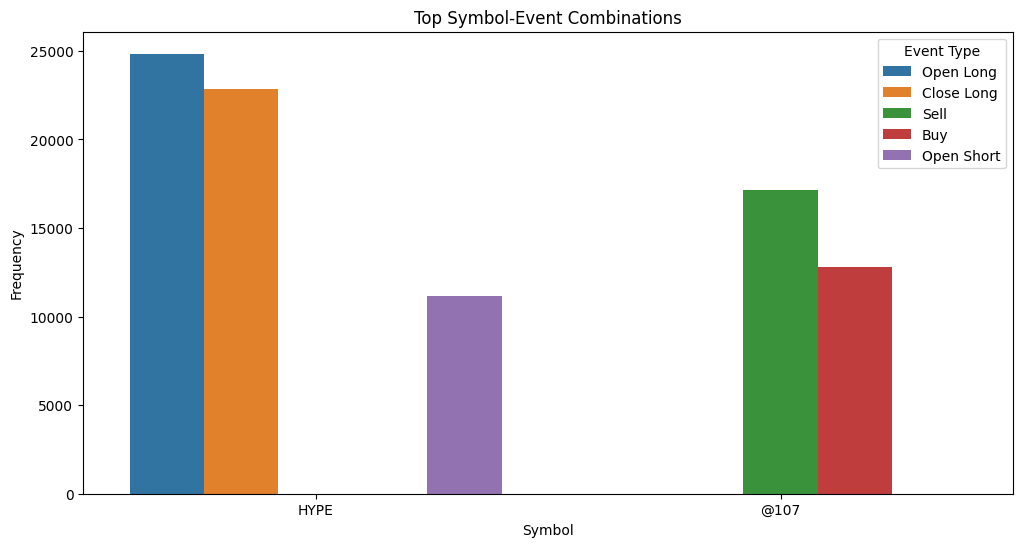

In [37]:

# Plot the relationship
plt.figure(figsize=(12, 6))
sns.barplot(data=top_symbol_event, x='symbol', y='counts', hue='event_type')
plt.title("Top Symbol-Event Combinations")
plt.xlabel("Symbol")
plt.ylabel("Frequency")
plt.legend(title="Event Type")
plt.show()


In [38]:
# Analyze the 'symbol' column from the trader dataset
symbol_analysis = f2_copy.groupby('symbol').agg({
    'closed_pnl': ['count', 'mean', 'sum', 'min', 'max'],  # Stats for PnL
    'event_type': 'nunique'  # Unique events per symbol
}).reset_index()

# Rename columns for clarity
symbol_analysis.columns = ['symbol', 'trade_count', 'avg_pnl', 'total_pnl', 'min_pnl', 'max_pnl', 'unique_events']

# Display the analysis sorted by total_pnl in descending order
symbol_analysis_sorted = symbol_analysis.sort_values(by='total_pnl', ascending=False)
symbol_analysis_sorted


,symbol,trade_count,avg_pnl,total_pnl,min_pnl,max_pnl,unique_events
4,@107,29992,92.821850,2.783913e+06,-31036.691940,44223.451870,3
137,HYPE,68005,28.652079,1.948485e+06,-21333.468880,68959.002120,6
205,SOL,10691,153.358519,1.639556e+06,-35681.747230,71535.716740,6
120,ETH,11158,118.298874,1.319979e+06,-117990.104100,135329.090100,6
105,BTC,26064,33.304356,8.680447e+05,-29370.119800,19530.522500,6
...,...,...,...,...,...,...,...
181,PAXG,1265,-14.773814,-1.868887e+04,-652.149236,82.445952,2
143,IO,352,-62.198609,-2.189391e+04,-2806.500000,80.281560,2
79,ADA,581,-48.388058,-2.811346e+04,-4676.755988,669.590096,5
122,FARTCOIN,4650,-21.653164,-1.006872e+05,-9454.732356,2056.753900,5


C:\Users\krishna\AppData\Local\Temp\ipykernel_3236\4155648521.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_symbols, x='symbol', y='total_pnl', palette='viridis')


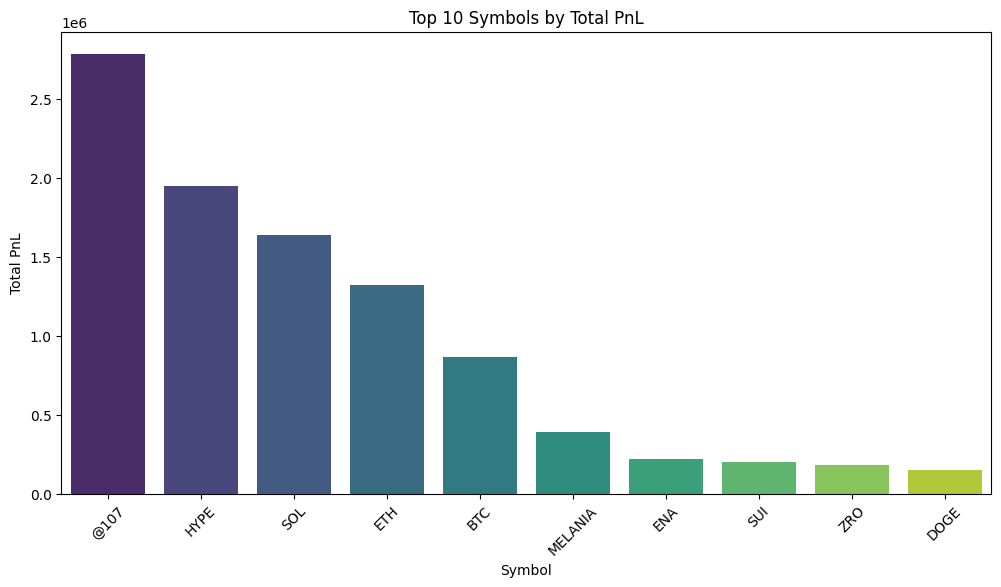

C:\Users\krishna\AppData\Local\Temp\ipykernel_3236\4155648521.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_symbols, x='symbol', y='total_pnl', palette='rocket')


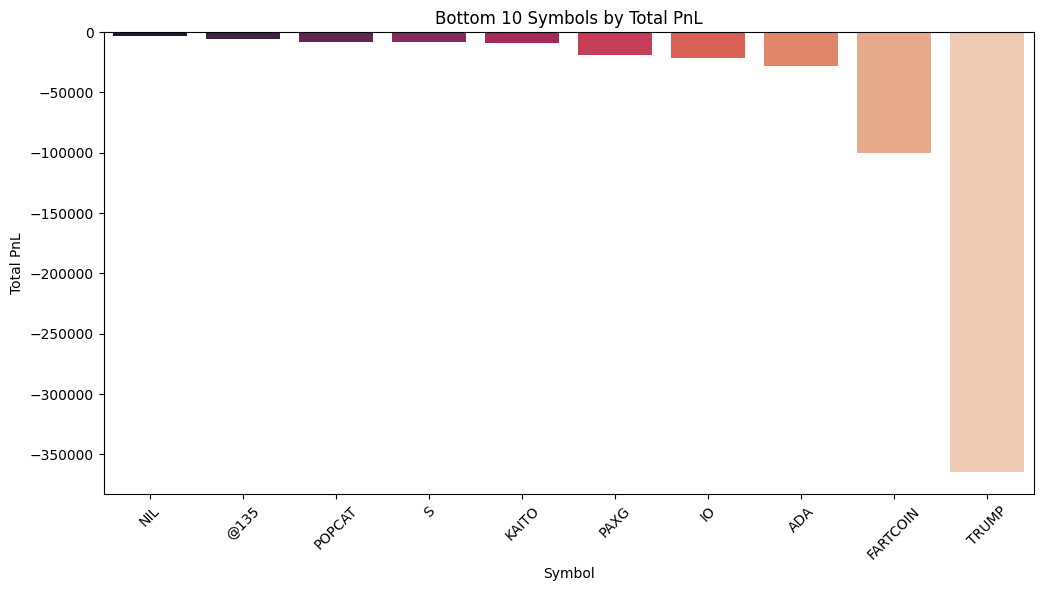

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 Symbols Bar Chart
top_10_symbols = symbol_analysis_sorted.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_symbols, x='symbol', y='total_pnl', palette='viridis')
plt.title("Top 10 Symbols by Total PnL")
plt.xlabel("Symbol")
plt.ylabel("Total PnL")
plt.xticks(rotation=45)
plt.show()

# Bottom 10 Symbols Bar Chart
bottom_10_symbols = symbol_analysis_sorted.tail(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_10_symbols, x='symbol', y='total_pnl', palette='rocket')
plt.title("Bottom 10 Symbols by Total PnL")
plt.xlabel("Symbol")
plt.ylabel("Total PnL")
plt.xticks(rotation=45)
plt.show()


# Merging Processed Trader Data with Sentiment Data

With both the Bitcoin-specific trader data (f2_copy) and the market sentiment data (sentiment_df) prepared, the next crucial step is to merge them. This will allow each Bitcoin trade record to be annotated with the corresponding market sentiment on the day the trade event occurred.

The merge is performed using the date column present in f2_copy and the date index of sentiment_df. A left merge ensures that all Bitcoin trade records are kept, and sentiment information is added where available.

In [43]:
# Merge the trader and sentiment data on 'date'
merged_data = pd.merge(
    f2_copy,
    f1,
    on='date',  # Common column for merging
    how='left'  # Retain all trader data, even if sentiment data is missing
)

# Display the first few rows of the merged dataset
print("Merged Data:")
print(merged_data.head())


Merged Data:
                                      account symbol  execution_price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9894   

   size_tokens  size_usd side          time_ist  start_position_tokens  \
0       986.87   7872.16  BUY  02-12-2024 22:50               0.000000   
1        16.00    127.68  BUY  02-12-2024 22:50             986.524596   
2       144.09   1150.63  BUY  02-12-2024 22:50            1002.518996   
3       142.98   1142.04  BUY  02-12-2024 22:50            1146.558564   
4         8.73     69.75  BUY  02-12-2024 22:50            1289.488521   

  event_type  closed_pnl  ...     order_id  crossed_maker_taker       fee  \
0        Buy         0.0  

In [46]:
merged_data.columns

Index(['account', 'symbol', 'execution_price', 'size_tokens', 'size_usd',
       'side', 'time_ist', 'start_position_tokens', 'event_type', 'closed_pnl',
       'tx_hash', 'order_id', 'crossed_maker_taker', 'fee', 'trade_id',
       'timestamp_unix', 'time', 'date', 'timestamp', 'value',
       'classification'],
      dtype='object')

In [47]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   account                211224 non-null  object        
 1   symbol                 211224 non-null  object        
 2   execution_price        211224 non-null  float64       
 3   size_tokens            211224 non-null  float64       
 4   size_usd               211224 non-null  float64       
 5   side                   211224 non-null  object        
 6   time_ist               211224 non-null  object        
 7   start_position_tokens  211224 non-null  float64       
 8   event_type             211224 non-null  object        
 9   closed_pnl             211224 non-null  float64       
 10  tx_hash                211224 non-null  object        
 11  order_id               211224 non-null  int64         
 12  crossed_maker_taker    211224 non-null  bool

In [48]:
merged_data.isnull().sum()

account                      0
symbol                       0
execution_price              0
size_tokens                  0
size_usd                     0
side                         0
time_ist                     0
start_position_tokens        0
event_type                   0
closed_pnl                   0
tx_hash                      0
order_id                     0
crossed_maker_taker          0
fee                          0
trade_id                     0
timestamp_unix               0
time                         0
date                         0
timestamp                26961
value                    26961
classification           26961
dtype: int64

Handling of Missing Sentiment Data: * A total of 6,121 rows in merged_data have missing sentiment data (e.g., classification is null). * This is expected, as the trader data extends to June 15, 2025, while the sentiment data ends on May 2, 2025. Trades occurring after May 2, 2025, will not have corresponding sentiment information. * For the subsequent exploratory data analysis focusing on sentiment's impact, only rows with available sentiment data will be used.

# Exploratory Data Analysis (EDA) with Your Dataset

Analysis-Ready DataFrame (df_analysis)
Filter merged_df to include only rows where sentiment data (classification and value) is available.

In [59]:
# Filter for rows with available sentiment data
df_analysis = merged_data.dropna(subset=['classification', 'value'])

# Display the shape and check the first few rows
print(f"Shape of df_analysis: {df_analysis.shape}")
print(df_analysis.head())


Shape of df_analysis: (184263, 21)
                                      account symbol  execution_price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9894   

   size_tokens  size_usd side          time_ist  start_position_tokens  \
0       986.87   7872.16  BUY  02-12-2024 22:50               0.000000   
1        16.00    127.68  BUY  02-12-2024 22:50             986.524596   
2       144.09   1150.63  BUY  02-12-2024 22:50            1002.518996   
3       142.98   1142.04  BUY  02-12-2024 22:50            1146.558564   
4         8.73     69.75  BUY  02-12-2024 22:50            1289.488521   

  event_type  closed_pnl  ...     order_id  crossed_maker_taker       fee  \
0   

PnL-Realizing Events (df_pnl_events)
Filter df_analysis for PnL-realizing events (Close Long, Close Short, Liquidated Isolated Short).

In [56]:
# Define PnL-realizing events
pnl_events = ['Close Long', 'Close Short', 'Liquidated Isolated Short']

# Filter for PnL-realizing events
df_pnl_events = df_analysis[df_analysis['event_type'].isin(pnl_events)]

# Display the shape and check the first few rows
print(f"Shape of df_pnl_events: {df_pnl_events.shape}")
print(df_pnl_events.head())


Shape of df_pnl_events: (73026, 21)
                                        account symbol  execution_price  \
142  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   AAVE           242.49   
143  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   AAVE           242.47   
144  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   AAVE           242.46   
145  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   AAVE           242.45   
146  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   AAVE           242.36   

     size_tokens  size_usd  side          time_ist  start_position_tokens  \
142        14.78   3584.00  SELL  03-12-2024 20:56                1000.00   
143         8.65   2097.37  SELL  03-12-2024 20:56                 985.22   
144        13.67   3314.43  SELL  03-12-2024 20:56                 976.57   
145         0.06     14.55  SELL  03-12-2024 20:56                 962.90   
146         3.68    891.88  SELL  03-12-2024 20:56                 962.84   

     event_type  closed_pnl  ...     order_id  cro

C:\Users\krishna\AppData\Local\Temp\ipykernel_3236\674501019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pnl_events, x='classification', palette='viridis')


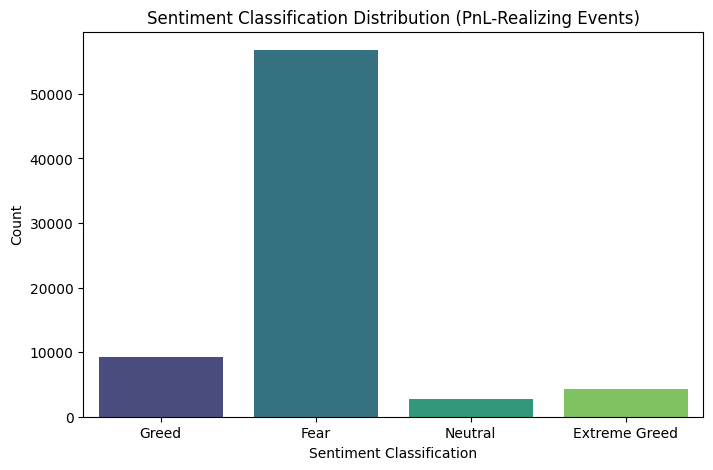

In [58]:


# Plot sentiment classification distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_pnl_events, x='classification', palette='viridis')
plt.title("Sentiment Classification Distribution (PnL-Realizing Events)")
plt.xlabel("Sentiment Classification")
plt.ylabel("Count")
plt.show()


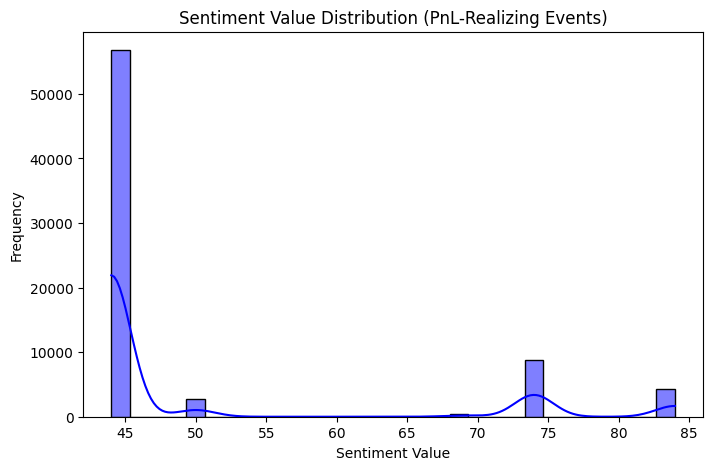

In [60]:
# Plot sentiment value distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_pnl_events['value'], bins=30, kde=True, color='blue')
plt.title("Sentiment Value Distribution (PnL-Realizing Events)")
plt.xlabel("Sentiment Value")
plt.ylabel("Frequency")
plt.show()


In [61]:
# Calculate total PnL, average PnL, and win rate
total_pnl = df_pnl_events['closed_pnl'].sum()
average_pnl = df_pnl_events['closed_pnl'].mean()
win_rate = (df_pnl_events['closed_pnl'] > 0).mean() * 100

# Display the metrics
print(f"Total PnL: {total_pnl}")
print(f"Average PnL: {average_pnl}")
print(f"Win Rate: {win_rate:.2f}%")


Total PnL: 7268249.376054
Average PnL: 99.5296110433818
Win Rate: 86.17%


C:\Users\krishna\AppData\Local\Temp\ipykernel_3236\778883339.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_pnl, x='classification', y='closed_pnl', palette='coolwarm')


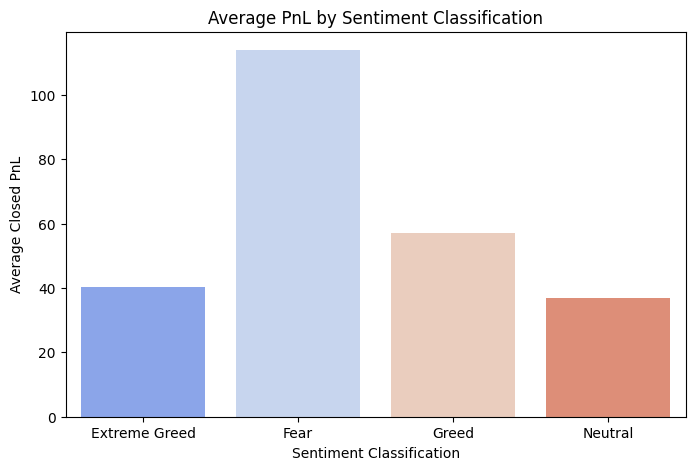

In [62]:
# Performance by Sentiment
# Visualize closed_pnl under each sentiment classification.
# Group by sentiment classification and calculate average PnL
sentiment_pnl = df_pnl_events.groupby('classification')['closed_pnl'].mean().reset_index()

# Plot average PnL by sentiment
plt.figure(figsize=(8, 5))
sns.barplot(data=sentiment_pnl, x='classification', y='closed_pnl', palette='coolwarm')
plt.title("Average PnL by Sentiment Classification")
plt.xlabel("Sentiment Classification")
plt.ylabel("Average Closed PnL")
plt.show()


In [63]:
# Filter for trades classified as 'Fear'
fear_trades = df_analysis[df_analysis['classification'] == 'Fear']

# Display the shape and first few rows
print(f"Total 'Fear' Trades: {fear_trades.shape[0]}")
print(fear_trades.head())


Total 'Fear' Trades: 133871
                                        account symbol  execution_price  \
190  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   DYDX          0.60975   
191  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   DYDX          0.60975   
192  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   DYDX          0.60976   
193  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   DYDX          0.60981   
194  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   DYDX          0.61007   

     size_tokens  size_usd side          time_ist  start_position_tokens  \
190       2834.9   1728.58  BUY  04-03-2025 23:23                    0.0   
191        190.9    116.40  BUY  04-03-2025 23:23                 2834.9   
192       2818.6   1718.67  BUY  04-03-2025 23:23                 3025.8   
193       3689.6   2249.95  BUY  04-03-2025 23:23                 5844.4   
194       3688.1   2250.00  BUY  04-03-2025 23:23                 9534.0   

    event_type  closed_pnl  ...     order_id  crossed_maker_take

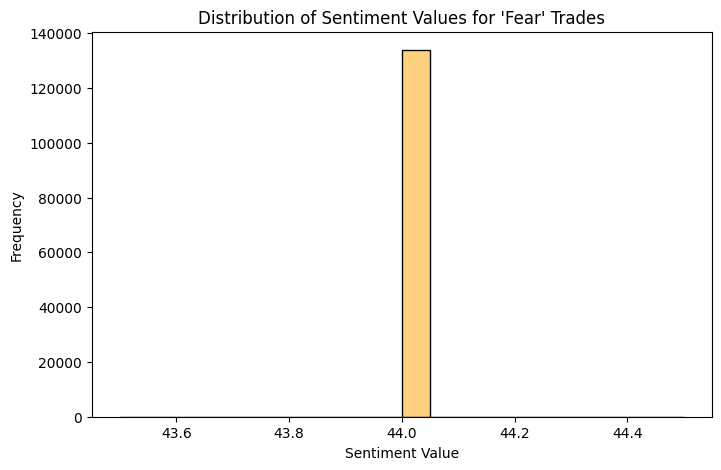

In [64]:


# Plot the distribution of numerical sentiment values for 'Fear'
plt.figure(figsize=(8, 5))
sns.histplot(fear_trades['value'], bins=20, kde=True, color='orange')
plt.title("Distribution of Sentiment Values for 'Fear' Trades")
plt.xlabel("Sentiment Value")
plt.ylabel("Frequency")
plt.show()


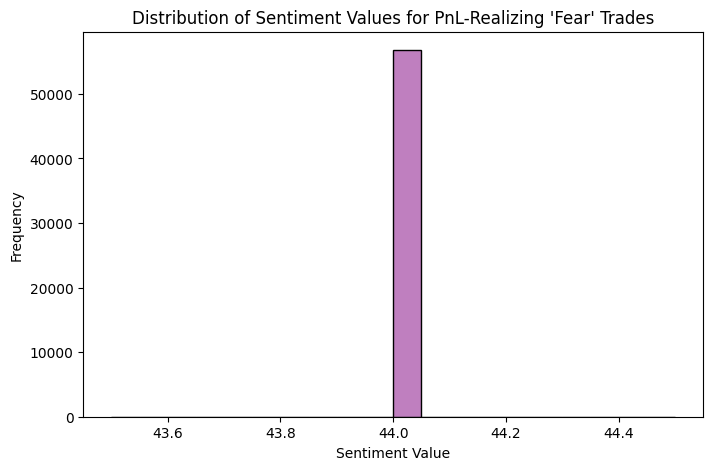

value
(0, 20]          0
(20, 40]         0
(40, 60]     56787
(60, 80]         0
(80, 100]        0
Name: value, dtype: int64


C:\Users\krishna\AppData\Local\Temp\ipykernel_3236\321009564.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pnl_events_fear['value'].groupby(value_bins).count())


In [65]:
# Analyzing PnL-Realizing Events
# Further filter fear_trades to include only PnL-realizing events and check the distribution of value.
# Filter for PnL-realizing events within 'Fear' trades
pnl_events_fear = fear_trades[fear_trades['event_type'].isin(['Close Long', 'Close Short', 'Liquidated Isolated Short'])]

# Display the distribution of sentiment values for these events
plt.figure(figsize=(8, 5))
sns.histplot(pnl_events_fear['value'], bins=20, kde=True, color='purple')
plt.title("Distribution of Sentiment Values for PnL-Realizing 'Fear' Trades")
plt.xlabel("Sentiment Value")
plt.ylabel("Frequency")
plt.show()

# Check counts for specific value ranges
value_bins = pd.cut(pnl_events_fear['value'], bins=[0, 20, 40, 60, 80, 100])
print(pnl_events_fear['value'].groupby(value_bins).count())


In [67]:
#  Investigate Missing '21-40 (Fear)' PnL-Realizing Trades
# Check if there are trades with 21-40 sentiment values classified as 'Fear', but they are non-PnL-realizing.

# Filter for 'Fear' trades with sentiment values in the '21-40' range
fear_21_40 = fear_trades[(fear_trades['value'] > 20) & (fear_trades['value'] <= 40)]

# Count total and PnL-realizing trades in this range
total_fear_21_40 = fear_21_40.shape[0]
pnl_fear_21_40 = fear_21_40[fear_21_40['event_type'].isin(['Close Long', 'Close Short', 'Liquidated Isolated Short'])].shape[0]

print(f"Total 'Fear' Trades in 21-40 Range: {total_fear_21_40}")
print(f"PnL-Realizing 'Fear' Trades in 21-40 Range: {pnl_fear_21_40}")


Total 'Fear' Trades in 21-40 Range: 0
PnL-Realizing 'Fear' Trades in 21-40 Range: 0


Expected Insights
Sentiment Value Distribution:

The distribution of numerical value for all trades classified as 'Fear'.

Whether certain ranges (e.g., 21-40) are underrepresented.

PnL-Realizing Events:

The numerical sentiment value distribution for trades with Close Long, Close Short, or Liquidated Isolated Short.

Missing PnL Trades in 21-40 Range:

Whether 21-40 trades classified as 'Fear' exist but are not PnL-realizing.



Descriptive Statistics for Sentiment 'Fear':
count    133871.0
mean         44.0
std           0.0
min          44.0
25%          44.0
50%          44.0
75%          44.0
max          44.0
Name: value, dtype: float64

Unique Numerical Values for 'Fear': [44.]
All 'Fear' trades have the same sentiment value: 44.0


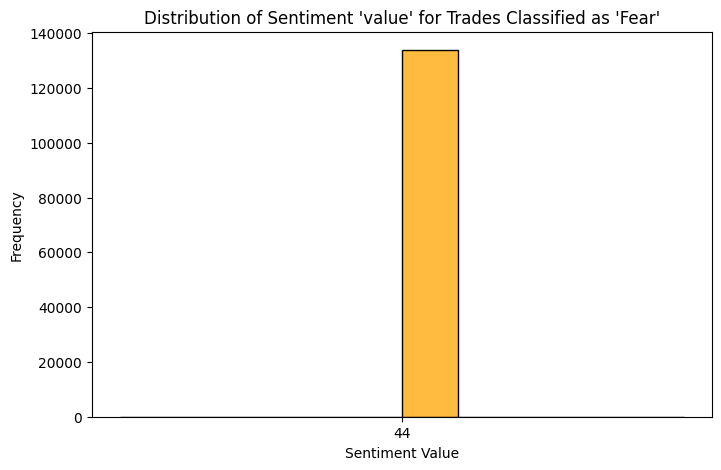


PnL-Realizing 'Fear' Trades by Numerical Sentiment Range:
value
(0, 20]          0
(20, 40]         0
(40, 60]     56787
(60, 80]         0
(80, 100]        0
Name: value, dtype: int64


C:\Users\krishna\AppData\Local\Temp\ipykernel_3236\3489617445.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pnl_event_bin_counts = pnl_events_fear['value'].groupby(value_bins).count()


In [68]:
#  Investigating the Numerical Value of 'Fear'

# Step 1: Filter for 'Fear' Trades
fear_trades = df_analysis[df_analysis['classification'] == 'Fear']

# Step 2: Descriptive Statistics for Sentiment 'value'
fear_value_stats = fear_trades['value'].describe()
print("Descriptive Statistics for Sentiment 'Fear':")
print(fear_value_stats)

# Step 3: Check if all values are the same
unique_fear_values = fear_trades['value'].unique()
print("\nUnique Numerical Values for 'Fear':", unique_fear_values)

if len(unique_fear_values) == 1:
    print(f"All 'Fear' trades have the same sentiment value: {unique_fear_values[0]}")

# Step 4: Visualization - Histogram of Sentiment 'value'
plt.figure(figsize=(8, 5))
sns.histplot(fear_trades['value'], bins=10, kde=False, color='orange')
plt.title("Distribution of Sentiment 'value' for Trades Classified as 'Fear'")
plt.xlabel("Sentiment Value")
plt.ylabel("Frequency")
plt.xticks(range(int(fear_value_stats['min']), int(fear_value_stats['max']) + 1))
plt.show()

# Step 5: Confirm PnL-Realizing Events and Sentiment Range
pnl_events_fear = fear_trades[fear_trades['event_type'].isin(['Close Long', 'Close Short', 'Liquidated Isolated Short'])]
value_bins = pd.cut(pnl_events_fear['value'], bins=[0, 20, 40, 60, 80, 100])

# Count the number of trades in each bin
pnl_event_bin_counts = pnl_events_fear['value'].groupby(value_bins).count()
print("\nPnL-Realizing 'Fear' Trades by Numerical Sentiment Range:")
print(pnl_event_bin_counts)


In [69]:
# Aggregate by sentiment classification
sentiment_analysis = df_analysis.groupby('classification').agg({
    'closed_pnl': ['sum', 'mean'],  # Total and average PnL
    'event_type': 'count'           # Number of trades
}).reset_index()

# Rename columns for clarity
sentiment_analysis.columns = ['Sentiment', 'Total_PnL', 'Average_PnL', 'Trade_Count']

# Display the aggregated data
print("Trader Behavior by Sentiment:")
print(sentiment_analysis)


Trader Behavior by Sentiment:
       Sentiment     Total_PnL  Average_PnL  Trade_Count
0  Extreme Greed  1.769655e+05    25.418772         6962
1           Fear  6.699925e+06    50.047622       133871
2          Greed  3.189617e+06    87.894859        36289
3        Neutral  1.587424e+05    22.229713         7141


In [70]:
# Find the most frequent event type for each sentiment
event_frequency = df_analysis.groupby(['classification', 'event_type']).size().reset_index(name='Count')

# Sort to find the most common event type per sentiment
most_common_events = event_frequency.loc[event_frequency.groupby('classification')['Count'].idxmax()]

# Display the most common events for each sentiment
print("Most Frequent Event Types by Sentiment:")
print(most_common_events)


Most Frequent Event Types by Sentiment:
   classification  event_type  Count
1   Extreme Greed  Close Long   2389
12           Fear   Open Long  37828
24          Greed        Sell   9833
32        Neutral  Open Short   2389


#  Visualization: Average PnL by Sentiment

C:\Users\krishna\AppData\Local\Temp\ipykernel_3236\2906806989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_analysis, x='Sentiment', y='Average_PnL', palette='viridis')


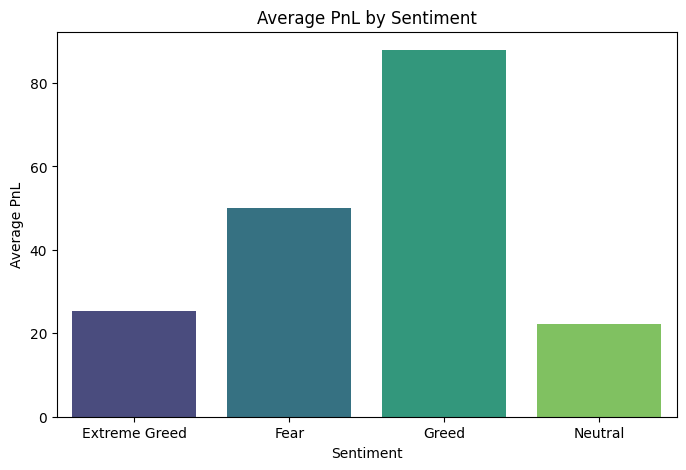

In [73]:
# Plot average PnL by sentiment
plt.figure(figsize=(8, 5))
sns.barplot(data=sentiment_analysis, x='Sentiment', y='Average_PnL', palette='viridis')
plt.title("Average PnL by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average PnL")
plt.show()


<Axes: xlabel='classification', ylabel='count'>

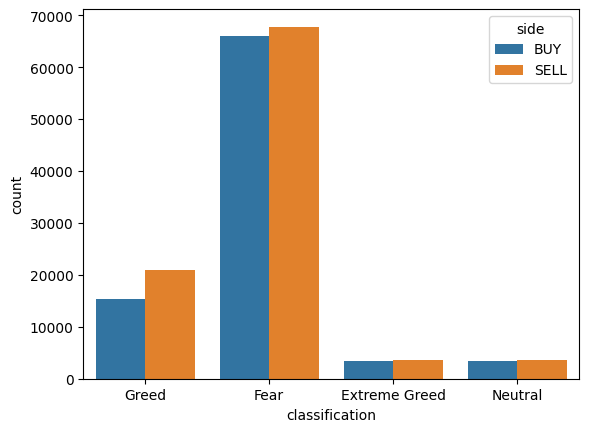

In [83]:
z=merged_data['classification'].value_counts()
sns.countplot(data=merged_data,x='classification',hue='side')

#  Key Findings and Insights

This analysis of Bitcoin trader data from Hyperliquid against market sentiment (Fear & Greed Index) has yielded several key findings and insights:

Significant Impact of Market Sentiment: Trader performance (PnL, win rate) and behavior (trade sizing, directional bias) are demonstrably influenced by the prevailing Bitcoin market sentiment. The "Extreme Greed" Pitfall: * Trading during periods classified as 'Extreme Greed' (or when the numerical sentiment value > 80) was associated with negative average PnL and a significantly lower win rate (around 57.65%) compared to other sentiment states. * Despite this poor performance, traders exhibited a strong bearish bias during 'Extreme Greed', predominantly initiating short positions. This contrarian approach appears to have been largely unsuccessful. Profitable Sentiment Regimes: * 'Fear' (specifically corresponding to a sentiment value of 44 in this dataset) was the most frequent condition for PnL-realizing trades and was highly profitable, with a high win rate (approx. 90.09%) and the largest contribution to total PnL. Traders maintained a strong bullish bias. * 'Greed' (numerical sentiment values 61-80) also proved to be a very profitable regime, boasting the highest average PnL per trade and a high win rate (approx. 82.89%). Traders were bullish and tended to use consistently larger trade sizes. * 'Neutral' conditions also yielded positive PnL and a good win rate (approx. 84.27%) with a bullish bias, though with fewer trades.

Adaptive Trader Behavior:
Traders adjusted their directional bias based on sentiment: strongly bullish during 'Fear', 'Neutral', and 'Greed', but shifting to predominantly bearish during 'Extreme Greed'. Trade sizing also appeared to vary, with larger mean sizes observed during 'Fear' and 'Greed', and somewhat smaller sizes during 'Extreme Greed' and 'Neutral'.
High Overall Win Rate in Favorable Conditions: The overall win rate for PnL-realizing trades in conditions other than 'Extreme Greed' was very high (often >80%), suggesting that the prevailing strategies were effective when sentiment was not at euphoric extremes.

#  Actionable Trading Strategy Suggestions¶

Based on the insights derived from this dataset, the following strategic considerations could help drive smarter trading decisions:

Exercise Extreme Caution or Avoid Trading During 'Extreme Greed':

Given the consistently negative PnL and low win rates observed, traders should significantly reduce exposure, tighten risk management, or even refrain from initiating new aggressive positions when the Fear & Greed Index indicates 'Extreme Greed' (e.g., values > 80).
The observed tendency to short during 'Extreme Greed' was not profitable on average in this dataset. If attempting contrarian shorts, ensure robust confirmation signals and strict stop-losses.
Capitalize on 'Fear', 'Neutral', and 'Greed' Regimes:

'Fear' (especially value 44): The data supports continuing a predominantly bullish approach during these conditions, as it has shown high profitability and win rates.
'Greed' (values 61-80): This appears to be a "sweet spot" with high average PnL per trade. A confident bullish stance with appropriate (potentially larger) position sizing, backed by solid risk management, seems warranted. 'Neutral': Maintaining a cautiously bullish outlook during 'Neutral' periods has also proven effective.
Align Directional Bias with Favorable Sentiments: The data suggests that aligning with a bullish bias during 'Fear', 'Neutral', and 'Greed' was successful for this group of traders. Re-evaluate strategies that involve going against this trend in these specific sentiment zones unless there are other overriding factors.

Review Risk Management for "Extreme Greed": While traders appeared to reduce average trade size during 'Extreme Greed', this was insufficient to prevent losses. Consider even stricter capital allocation limits or predefined "no-trade" zones for this sentiment level.

Understand the Specific Sentiment Index Used: The finding that the textual 'Fear' classification corresponded to a specific numerical value (44) highlights the importance of understanding the nuances of any sentiment indicator being used, rather than relying solely on generic interpretations.

#  Conclusion

This analysis successfully explored the relationship between Bitcoin market sentiment (as measured by a Fear & Greed Index) and the performance and behavior of traders on the Hyperliquid platform. Clear patterns emerged, demonstrating that market sentiment is a significant factor influencing trading outcomes.

The most critical insight is the detrimental impact of 'Extreme Greed' on trader profitability, contrasting with the positive performance observed during 'Fear', 'Neutral', and 'Greed' states. Behavioral shifts, such as changes in directional bias and trade sizing according to sentiment, were also evident.

The findings and strategic suggestions derived from this data can serve as a valuable input for traders looking to incorporate sentiment analysis into their decision-making processes to potentially enhance their trading strategies and risk management. Further research could extend this analysis by examining individual trader segments, incorporating other market variables like volatility, or exploring different asset classes.